In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
from PIL import Image, ImageFilter
from IPython.display import Image
from sklearn.model_selection import train_test_split

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### 1) We first load in the dataset into a pandas dataframe.

In [2]:
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')

In [3]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


#### 2) We then convert deault and student to categorical variables.

In [4]:
df_default = pd.get_dummies(df['default'])
df_student = pd.get_dummies(df['student'])
df_final = pd.concat([df_default, df_student, df[['balance','income']],], axis=1)
df_final = df_final.drop(df_final.columns[[0, 2]],axis=1)
df_final.columns = ['default', 'student', 'balance', 'income']
df_final.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


#### 3) We make boxplots of all of the variables and a scatter plot of of (balance,income) with the color of the outcome of default labeled red if yes and blue if no.

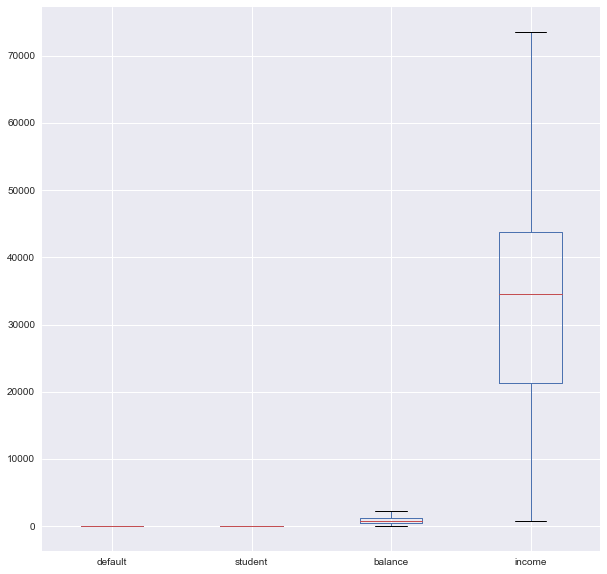

In [5]:
plt.figure(figsize=(10,10))
df_final.boxplot()
plt.show()

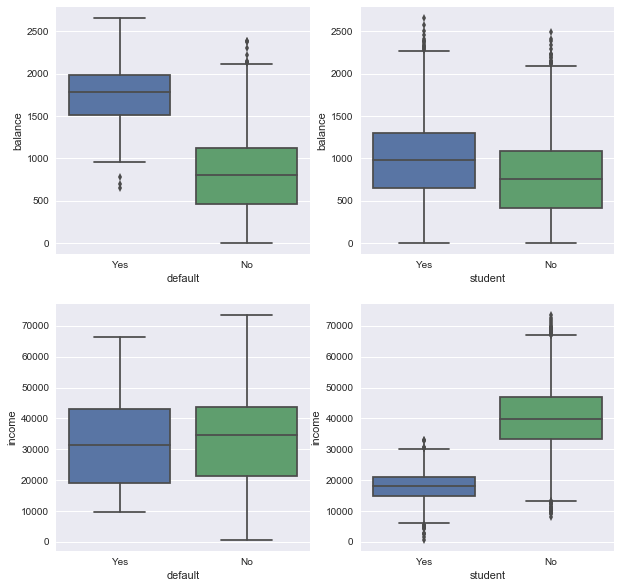

In [74]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
ax=sns.boxplot(x=df["default"],y=df["balance"],data=df,order=["Yes", "No"])
plt.subplot(2, 2, 2)
ax=sns.boxplot(x=df["student"],y=df["balance"],data=df,order=["Yes", "No"])
plt.subplot(2, 2, 3)
ax=sns.boxplot(x=df["default"],y=df["income"],data=df,order=["Yes", "No"])
plt.subplot(2, 2, 4)
ax=sns.boxplot(x=df["student"],y=df["income"],data=df,order=["Yes", "No"])

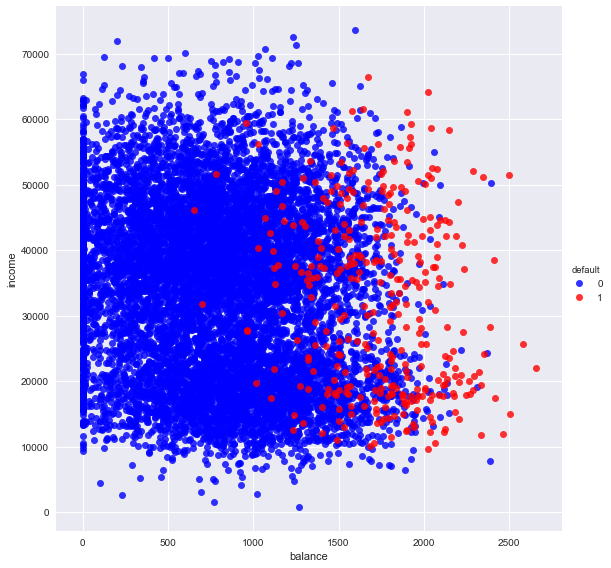

In [6]:
sns.lmplot('balance', 'income', data=df_final, hue='default', palette=['blue','red'], fit_reg=False, size=8)

#### 4) We train a model to predict if a student defaults on their loan or not using LogisticRegression based soley on the balance and income variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

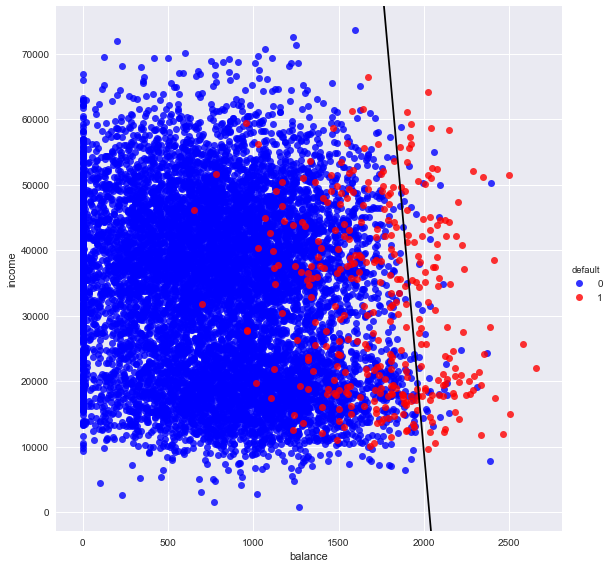

In [7]:
X = df_final[['balance','income']]
y = df_final['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


logisticRegr = LogisticRegression(penalty='l1')
logisticRegr.fit(X_train, y_train)
coef = logisticRegr.coef_
b = logisticRegr.intercept_

x = np.linspace(0,3000,2000)
w = logisticRegr.coef_[0]
y = (b + w[0] * x) / -w[1]

sns.lmplot('balance', 'income', data=df_final, hue='default', palette=['blue','red'], fit_reg=False, size=8)
axes = plt.gca()
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])
plt.plot(x, y, c='black')
plt.show()

In [13]:
# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.960648


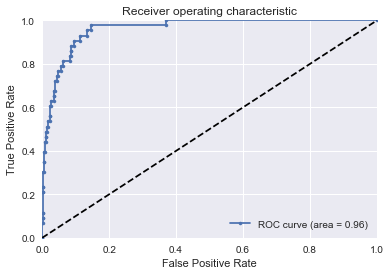

In [9]:
X = df_final[['balance','income']]
y = df_final['default']

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')

# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

Based on the above output, we can obtain the AUC ROC, which is 0.960648.

#### 5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients. 

Area under the ROC curve : 0.959703
Area under the ROC curve : 0.960176
Area under the ROC curve : 0.960562
Area under the ROC curve : 0.960634
Area under the ROC curve : 0.960849
Area under the ROC curve : 0.961150
Area under the ROC curve : 0.961307
Area under the ROC curve : 0.961450
Area under the ROC curve : 0.961636
Area under the ROC curve : 0.961665
Area under the ROC curve : 0.961708
Area under the ROC curve : 0.961751
Area under the ROC curve : 0.961780
Area under the ROC curve : 0.961765
Area under the ROC curve : 0.961851
Area under the ROC curve : 0.961980
Area under the ROC curve : 0.961995
Area under the ROC curve : 0.962009
Area under the ROC curve : 0.962037
Area under the ROC curve : 0.962052
Area under the ROC curve : 0.962138
Area under the ROC curve : 0.962209
Area under the ROC curve : 0.962224
Area under the ROC curve : 0.962238
Area under the ROC curve : 0.962295
Area under the ROC curve : 0.962238
Area under the ROC curve : 0.962224
Area under the ROC curve : 0

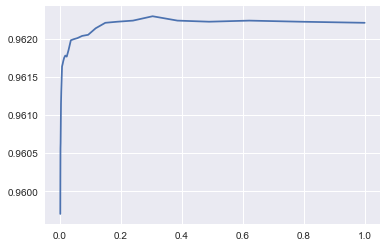

In [64]:
X = df_final[['student', 'balance', 'income']]
y = df_final['default']

scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

#Optimize using Ridge regression
alphas = np.logspace(-3,0,30)

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l2')

    # Train the model using the training sets
    #regr.fit(X_train, y_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)
plt.plot(alphas,scores)

Area under the ROC curve : 0.962295


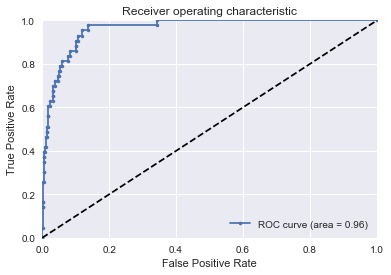

In [67]:
alpha_best= alphas[np.argmax(scores)]

# Generate ROC  for LR with l2 penalty and optimal C
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=alpha_best,penalty='l2')

# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

Based on the above output, we can find the AOC ROC increases a little bit(from 0.960648 to 0.962295) comparing to the previous one without the student variable. So we can conclude the performance has improved a little bit with the added variable.

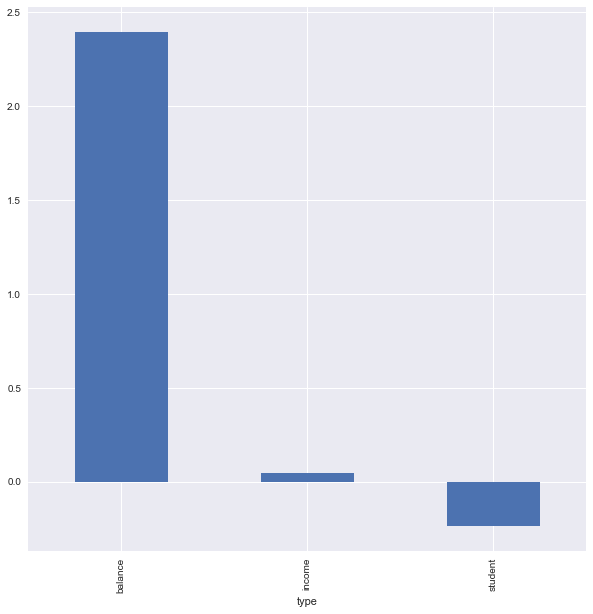

In [68]:
coef =  LogisticRegression(C=alpha_best, penalty='l2').fit(X,y).coef_

# Show coefficient
dfCoeffs = pd.DataFrame({'type':df_final.columns.values[1:], 'coef':coef[0]})
plt.figure(figsize=(10,10))
dfCoeff = dfCoeffs.groupby('type')['coef'].mean()
dfCoeff.plot(kind='bar')

Based on the above ranking of coefficient plot, we can conclude the 'balance' feature is much more important than the 'income' and 'stundet' feature.

#### 6) We use cross validation to check the model built in 5) is robust.

Area under the ROC curve : 0.942862


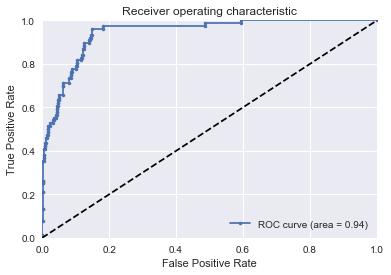

Area under the ROC curve : 0.954472


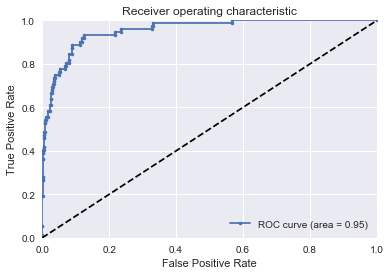

Area under the ROC curve : 0.940656


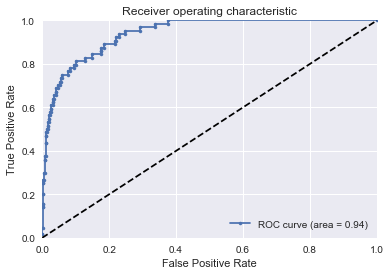

Area under the ROC curve : 0.949301


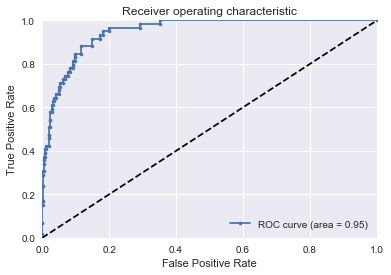

Area under the ROC curve : 0.960218


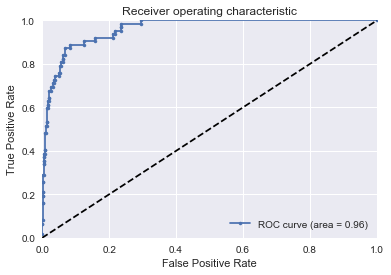

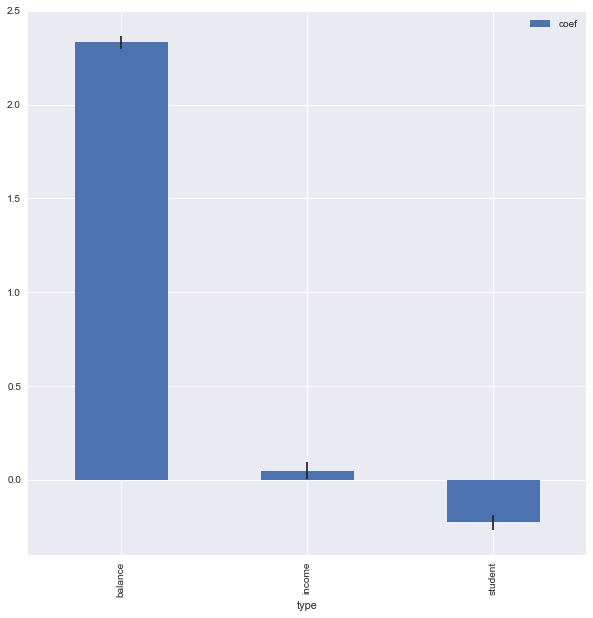

In [97]:
X = df_final[['student','balance','income']]
y = df_final['default']
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)


def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
   
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Initialize a classifier with key word arguments   
        classifier = clf_class(**kwargs)
        probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        print ("Area under the ROC curve : %f" % roc_auc)
        # Plots ROC
        generate_ROCplot(fpr,tpr,'LR',roc_auc)
        coeffs.append(classifier.coef_)
    return coeffs

def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][0][i] + coeffs[1][0][i] + coeffs[2][0][i] + coeffs[3][0][i] + coeffs[4][0][i])/5 for i in range(0,3)]
    coeffs_std = [np.std([coeffs[0][0][i],coeffs[1][0][i],coeffs[2][0][i],coeffs[3][0][i],coeffs[4][0][i]]) for i in range(0,3)]
    return coeffs_avgd, coeffs_std



coeffs = run_cv(X, y, LogisticRegression, C=alpha_best, penalty='l2')

coeffs_avg,coeffs_std=get_coeffs(coeffs)
dfCoeffs = pd.DataFrame({'type':df_final.columns.values[1:], 'coef':coeffs_avg, 'std':coeffs_std})
# dfCoeffs=dfCoeffs.drop(dfCoeffs.index[3])

plt.figure(figsize=(15,15))

dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values

dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(10,10))

Based on the above cross valiation outputs, we can find the AUC ROC values are all around 0.95, which are consistent for different folds. Also, the estimated coefficients are also consistent based on the coefficient plot with error bars. So we can conclude that the model we built in 5) is robust.

#### 7) We train a Decision Tree classifier with maximum depth 5 and plot the decision tree

Automatically created module for IPython interactive environment


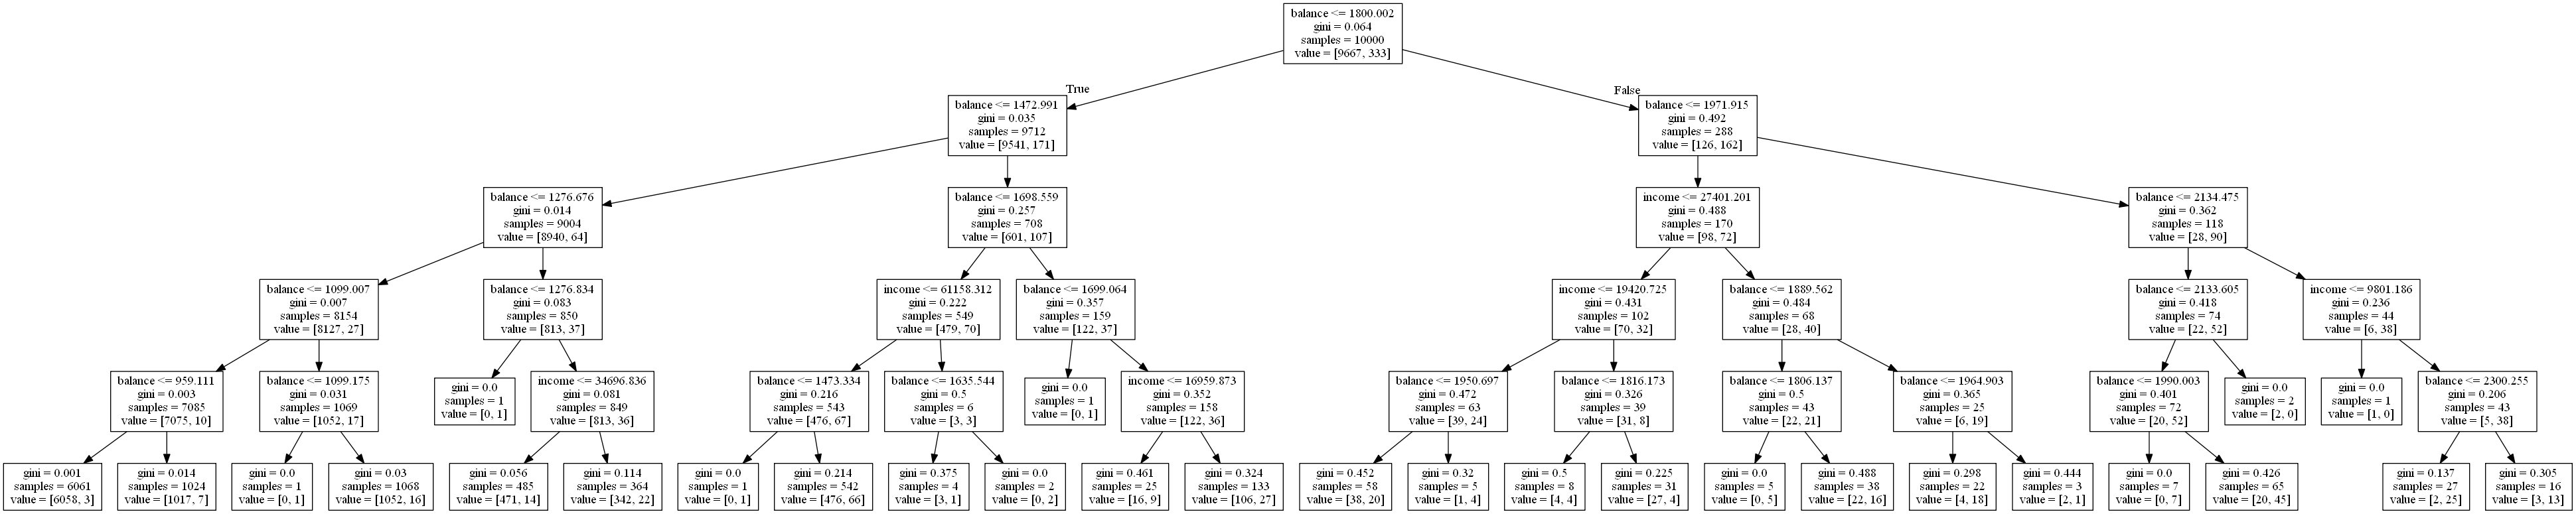

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
print(__doc__)

X = df_final[['balance', 'income', 'student']]
y = df_final['default']

tree_5 = DecisionTreeClassifier(max_depth=5)
tree_5.fit(X, y)

dot_data=export_graphviz(tree_5, out_file=None, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Area under the ROC curve : 0.932280


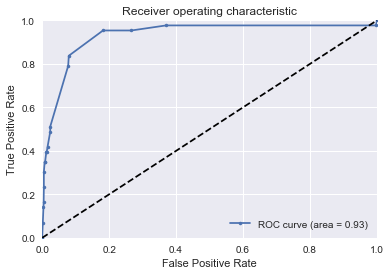

In [57]:
# Generate ROC  
fpr, tpr, roc_auc, thresholds = generate_auc(X, y, DecisionTreeClassifier, max_depth=5)

# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

Based on the above output, we can conclude the AUC ROC is 0.932280. It is a little bit smaller compaing to previous logistic regression. 

#### 8) Find the optimal decision tree depth and compute the AUC ROC.

Area under the ROC curve : 0.747809
Area under the ROC curve : 0.904786
Area under the ROC curve : 0.951562
Area under the ROC curve : 0.950016
Area under the ROC curve : 0.932280
Area under the ROC curve : 0.799741
Area under the ROC curve : 0.763640
Area under the ROC curve : 0.747544
Area under the ROC curve : 0.761893


3

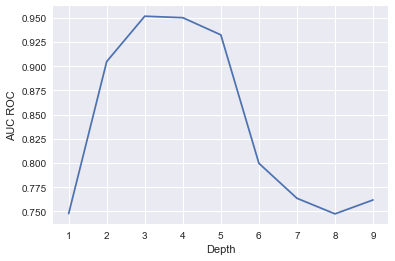

In [55]:
scores=[]
depths = range(1,10)

for n in depths:
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,DecisionTreeClassifier,max_depth=n)
    scores.append(roc_auc)
    
plt.ylabel('AUC ROC')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
n_opt

Based on the above plot, we can conclude the optimal decision tree depth is 3.

Area under the ROC curve : 0.951562


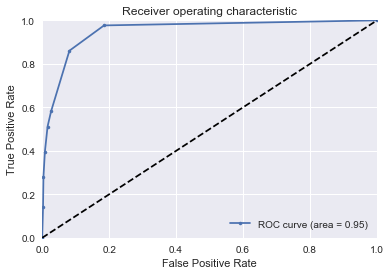

In [56]:
# Generate ROC  
fpr, tpr, roc_auc, thresholds = generate_auc(X, y, DecisionTreeClassifier, max_depth=3)

# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

Based on the above output, we can conclude the AUC ROC is 0.951562, which is larger comparing to the previous decision tree classifier with depth 5. However, it is a little bit smaller than the previous logistic regression classifier.